In [6]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
 (X_train, y_train),(X_test, y_test)=mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

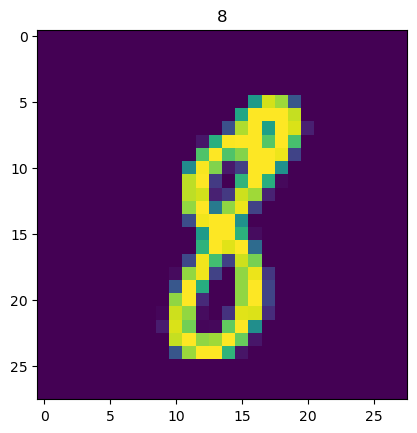

In [22]:
plt.imshow(X_train[300])
plt.title(y_train[300])
plt.show()

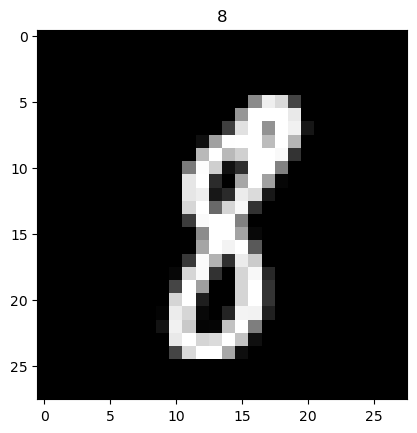

In [10]:
plt.imshow(X_train[300], cmap='gray')
plt.title(y_train[300])
plt.show()

In [24]:
X_train=X_train.reshape((-1,28,28,1))
X_test=X_test.reshape((-1,28,28,1))

In [11]:
## creating model

from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [15]:
model= Sequential()

In [17]:
model.add(Conv2D(filters=4, kernel_size=(5,5), activation='relu',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=4, kernel_size=(7,7), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam', metrics=['acc'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 4)         404       
                                                                 
 average_pooling2d (AverageP  (None, 10, 10, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 4)           788       
                                                                 
 average_pooling2d_1 (Averag  (None, 2, 2, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 16)                0

In [25]:
model.fit(X_train, y_train, epochs=1, batch_size=1)

60000/60000 [==============================] - 243s 4ms/step - loss: 0.1998 - acc: 0.9434


In [27]:
import pandas

In [ ]:
img=pandas.imread(".\\model development\\images\\img_111.jpg")

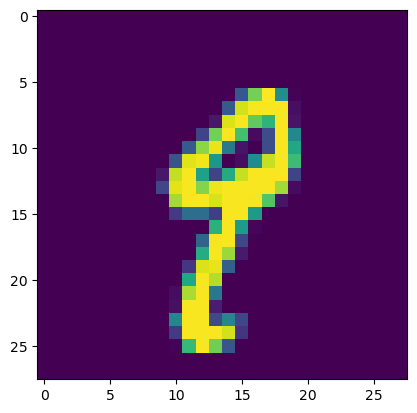

In [33]:
plt.imshow(X_test[78])

In [34]:
test=X_test[78].reshape(-1,28,28,1)

In [32]:
model.predict_classes(test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [35]:
model.save("./mnist.h5")